In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

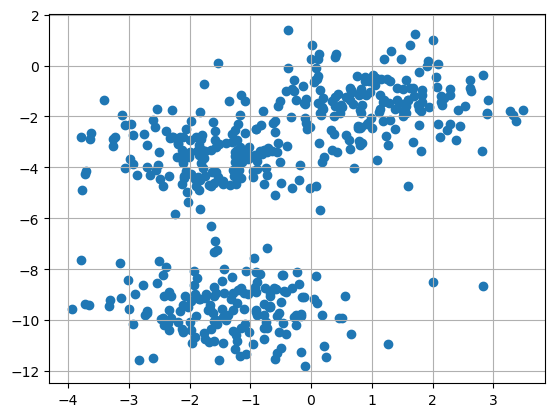

In [80]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 2)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

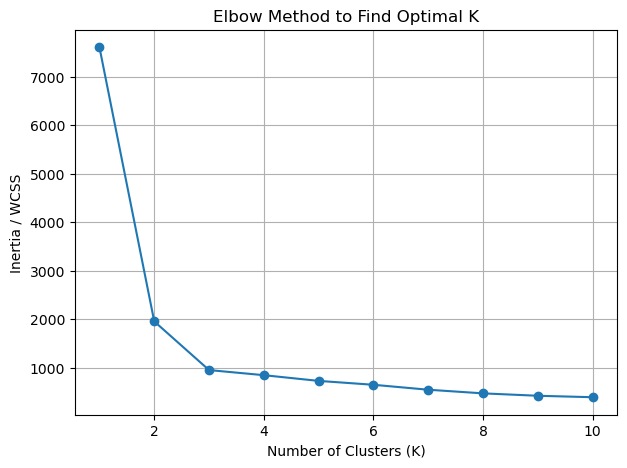

In [81]:
# -----------------------------
# 2. Elbow Method
# -----------------------------
inertia_values = []     # WCSS values
K = range(1, 11)         # Try K from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(7, 5))
plt.plot(K, inertia_values, marker='o')
plt.title("Elbow Method to Find Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia / WCSS")
plt.grid(True)
plt.show()


In [82]:
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }
    
    clusters[idx] = cluster
    
clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

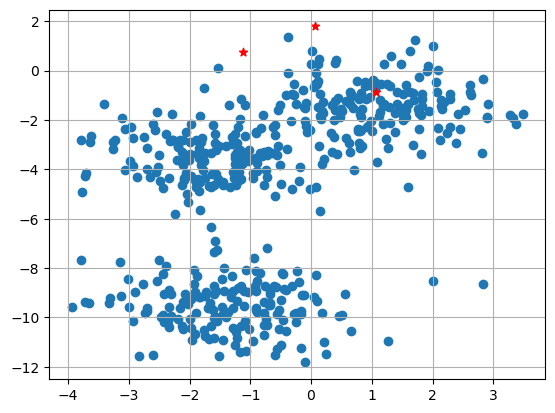

In [83]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

In [84]:

def distance(p1,p2):
    
    return np.sqrt(np.sum((p1-p2)**2))
    
def assign_clusters(X, clusters):
    sum = 0 
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
    
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    print(clusters)
    return clusters

def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            
            clusters[i]['points'] = []
    return clusters






def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred   


clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

{0: {'center': array([0.06919154, 1.78785042]), 'points': [array([0.01049389, 0.79313058]), array([1.70677401, 1.23618273]), array([2.0119666 , 1.00882614]), array([0.4068616, 0.4409642]), array([-0.37638912,  1.3767851 ])]}, 1: {'center': array([ 1.06183904, -0.87041662]), 'points': [array([ 1.83086535, -1.42523455]), array([1.30852564, 0.57265606]), array([-0.91057159, -2.49169253]), array([ 0.46835789, -1.88336083]), array([-0.70828496, -3.24441739]), array([ -1.50834952, -11.55108763]), array([1.62861332, 0.80867712]), array([ 1.77626964, -1.70061519]), array([-0.68028153, -8.9320909 ]), array([-0.28630733, -0.56090213]), array([ -2.33805418, -10.39048298]), array([-1.85148357, -9.1890433 ]), array([ 0.05738064, -0.55814169]), array([ 2.41821659, -1.74041004]), array([-1.17533473, -3.54072066]), array([ 0.380498  , -2.68699416]), array([2.08210802, 0.0417596 ]), array([-1.73432981, -8.96710465]), array([ -1.23856256, -10.59940081]), array([ -0.10657046, -11.82507855]), array([ -0.5

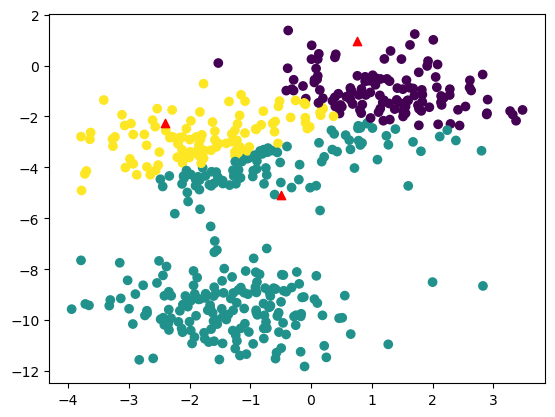

In [85]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()